In [71]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# 1. Сравнение средних значений (скорость доставки) | t - test

In [50]:
experiment = pd.read_csv('/Users/askhabaliev/Desktop/analysis/experiment_lesson_4.csv')

In [4]:
#сопоставим графики распределения

district
Central     AxesSubplot(0.125,0.125;0.775x0.755)
Purlieus    AxesSubplot(0.125,0.125;0.775x0.755)
Suburb      AxesSubplot(0.125,0.125;0.775x0.755)
Name: delivery_time, dtype: object

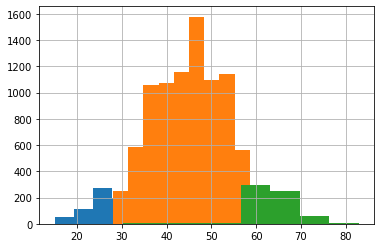

In [5]:
experiment.query('experiment_group =="control"').groupby('district').delivery_time.hist()

district
Central     AxesSubplot(0.125,0.125;0.775x0.755)
Purlieus    AxesSubplot(0.125,0.125;0.775x0.755)
Suburb      AxesSubplot(0.125,0.125;0.775x0.755)
Name: delivery_time, dtype: object

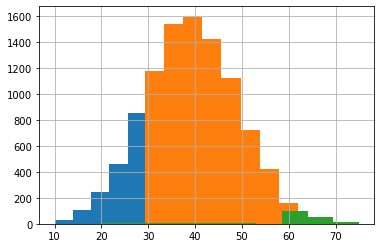

In [6]:
experiment.query('experiment_group =="test"').groupby('district').delivery_time.hist()

In [7]:
#на сколько по модулю отличается количество наблюдений в тесте и контроле

cnt = experiment.groupby('experiment_group').order_id.count()
np.abs(cnt[0] - cnt[1])

12

In [8]:
#проверим выполнение условий на нормальность и посчитаем стандартное отклонение в тесте и в контроле

stats.shapiro(experiment.query('experiment_group =="test"').delivery_time.sample(1000, random_state=1))

ShapiroResult(statistic=0.9973375201225281, pvalue=0.09964225441217422)

In [9]:
stats.shapiro(experiment.query('experiment_group =="control"').delivery_time.sample(1000, random_state=1))

ShapiroResult(statistic=0.9971250295639038, pvalue=0.07028137892484665)

In [10]:
round(experiment.query('experiment_group =="test"').delivery_time.std())

10

In [11]:
round(experiment.query('experiment_group =="control"').delivery_time.std())

10

In [12]:
#пришло время сравнить средние в тесте и контроле

stats.ttest_ind(experiment.query('experiment_group =="test"').delivery_time,
                experiment.query('experiment_group =="control"').delivery_time)

Ttest_indResult(statistic=-43.03582663183714, pvalue=0.0)

In [13]:
test_mean = experiment.query('experiment_group =="test"').delivery_time.mean()
control_mean = experiment.query('experiment_group =="control"').delivery_time.mean()

In [14]:
perc = (test_mean - control_mean)/control_mean * 100

In [15]:
#в тестовой группе, время доставки изменилось:
round(perc, 2)

-13.35

В итоге результат статистически значимый

# 2. Дисперсионный анализ (однофакторный) | формат фотографий

In [16]:
exp_1 = pd.read_csv('/Users/askhabaliev/Desktop/analysis/exp_1.csv')
exp_2 = pd.read_csv('/Users/askhabaliev/Desktop/analysis/exp_2.csv')

Являются ли дисперсии внутри групп примерно одинаковыми (гомогенными), проверим это с помощью теста Левена

In [18]:
a_pc = exp_1.query('group == "A"').events
b_pc = exp_1.query('group == "B"').events
c_pc = exp_1.query('group == "C"').events

stats.levene(a_pc, b_pc, c_pc)

LeveneResult(statistic=2.2622596339318037, pvalue=0.1041327199523974)

Применим тест Шапиро-Уилка, проверим на нормальность распределения

In [21]:
stats.shapiro(a_pc.sample(1000, random_state=1))

ShapiroResult(statistic=0.9977062940597534, pvalue=0.18026378750801086)

In [22]:
stats.shapiro(b_pc.sample(1000, random_state=1))

ShapiroResult(statistic=0.998369574546814, pvalue=0.47247016429901123)

In [23]:
stats.shapiro(b_pc.sample(1000, random_state=1))

ShapiroResult(statistic=0.998369574546814, pvalue=0.47247016429901123)

Для сравнения средних будем использовать однофакторный дисперсионный анализ

In [25]:
stats.f_oneway(a_pc, b_pc, c_pc)

F_onewayResult(statistic=2886.166657438961, pvalue=0.0)

Теперь используем критерий Тьюки и определим, между какими группами есть статистически значимые различия

In [29]:
pairwise_tukeyhsd(exp_1['events'], groups=exp_1['group']).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
A,B,8.034,0.001,7.7038,8.3642,True
A,C,-2.1093,0.001,-2.4395,-1.7791,True
B,C,-10.1433,0.001,-10.4735,-9.8131,True


Text(0, 0.5, 'Число покупок')

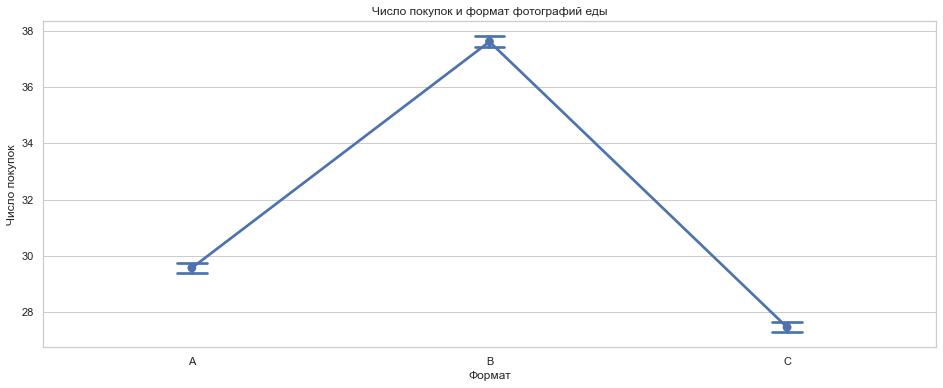

In [38]:
sns.set(rc={'figure.figsize':(16,6)}, style='whitegrid')

sns.pointplot(x = 'group', y = 'events', data = exp_1, capsize = .1)
plt.title('Число покупок и формат фотографий еды')
plt.xlabel('Формат')
plt.ylabel('Число покупок')

# 3. Многофакторный дисперсионный анализ | формат фотографий

В следующем эксперименте требуется проверить, как пользователи отреагируют на изменение формата кнопки оформления заказа, с разбивкой по сегменту клиента

Для начала посмотрим на данные для контрольной и тестовой групп.

<AxesSubplot:xlabel='events'>

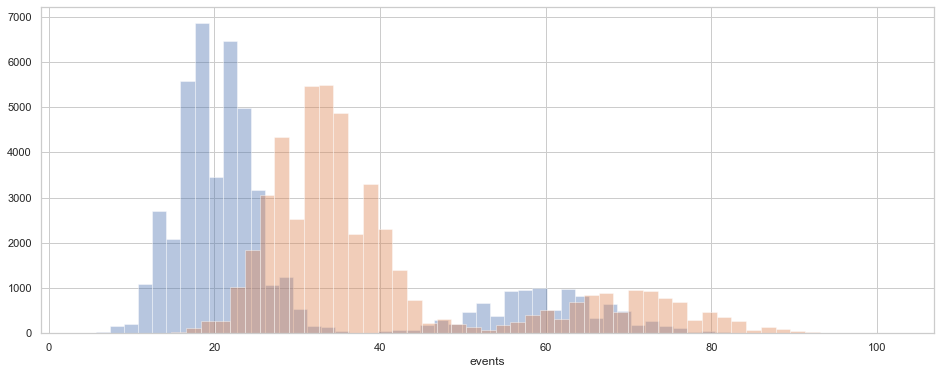

In [46]:
sns.distplot(exp_2.query('group=="control"').events, kde=False)
sns.distplot(exp_2.query('group=="test"').events, kde=False)

Посчитаем среднее, медиану и стандартное отклонение events в разбивке по группе и по сегменту пользователя.

In [49]:
exp_2.groupby(['group', 'segment']).events.describe().T

group         control                        test              
segment          high           low          high           low
count    10000.000000  40000.000000  10000.000000  40000.000000
mean        59.970800     20.031575     69.938500     33.025925
std          7.805347      4.473576      8.403974      5.720845
min         31.000000      4.000000     40.000000     13.000000
25%         55.000000     17.000000     64.000000     29.000000
50%         60.000000     20.000000     70.000000     33.000000
75%         65.000000     23.000000     76.000000     37.000000
max         89.000000     41.000000    102.000000     59.000000

Теперь проведем тест, а затем используем критерий Тьюки, чтобы понять между какими группами есть статистически значимые различия.

In [70]:
model = smf.ols(formula='events ~ segment + group + segment:group', data=exp_2).fit()
aov_table = anova_lm(model, typ=2)

round(aov_table, 2)

,sum_sq,df,F,PR(>F)
segment,23624796.65,1.0,689756.38,0.0
group,3837195.41,1.0,112031.86,0.0
segment:group,36642.44,1.0,1069.82,0.0
Residual,3424955.89,99996.0,NaN,NaN


In [74]:
exp_2['combination'] = exp_2.segment + ' \ ' + exp_2.group

In [75]:
exp_2.head()

,id,group,segment,events,combination
0,83440,test,high,78.0,high \ test
1,96723,test,high,71.0,high \ test
2,68719,test,high,80.0,high \ test
3,50399,test,high,80.0,high \ test
4,95613,test,high,78.0,high \ test


In [78]:
pairwise_tukeyhsd(exp_2['events'], groups=exp_2['combination']).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
high \ control,high \ test,9.9677,0.001,9.7551,10.1803,True
high \ control,low \ control,-39.9392,0.001,-40.1073,-39.7711,True
high \ control,low \ test,-26.9449,0.001,-27.113,-26.7768,True
high \ test,low \ control,-49.9069,0.001,-50.075,-49.7388,True
high \ test,low \ test,-36.9126,0.001,-37.0807,-36.7445,True
low \ control,low \ test,12.9944,0.001,12.888,13.1007,True


● Для обоих сегментов показатели статистически значимо _увеличились_ по сравнению с контрольной группой

● Разница между значением у тестовой группы сегмента low и контрольной группой этого же сегмента равна примерно 13

● Разница между control/high и test/high составила около 10

Визуализируем результаты

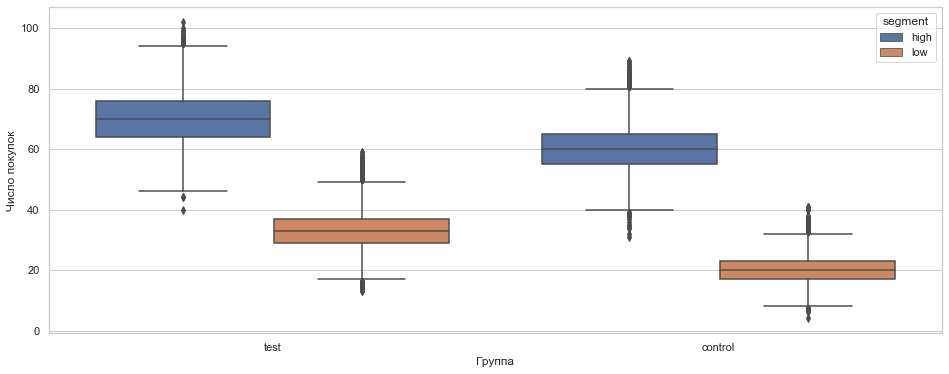

In [85]:
sns.boxplot(x='group', y='events', hue='segment', data=exp_2)
plt.xlabel('Группа')
plt.ylabel('Число покупок')
plt.show()

Фактор group оказался значимым, фактор segment – значимым, их взаимодействие – значимо. Судя по графику, для всех групп среднее значение events - увеличелось, поэтому решение: используем новую версию